In [58]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=r'C:\Users\777\PycharmProjects\uchuneyronki\NN\MNIST\CIFAR10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=r'C:\Users\777\PycharmProjects\uchuneyronki\NN\MNIST\CIFAR10', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


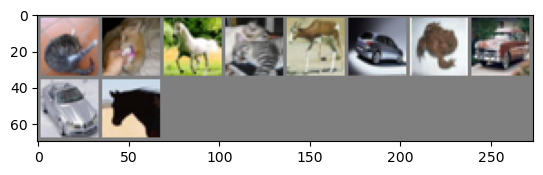

  cat   dog horse   cat  deer   car  frog   car   car horse


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))


In [20]:
total = 0
dic_count = {i: 0 for i in range(10)}
dic_graph = {}

In [41]:
print(len(trainset))
print((len(testset)))

50000
10000


In [21]:
for dat in trainset:
    tens, mark = dat
    dic_count[int(mark)] += 1
    total += 1
tg = 0
for k,v in dic_count.items():
    print(f'Процентоное соотношение класса {classes[tg]} от общего кол-ва цифр: {v*100/total}%')
    dic_graph[classes[tg]]=v
    tg += 1



Процентоное соотношение класса plane от общего кол-ва цифр: 10.0%
Процентоное соотношение класса car от общего кол-ва цифр: 10.0%
Процентоное соотношение класса bird от общего кол-ва цифр: 10.0%
Процентоное соотношение класса cat от общего кол-ва цифр: 10.0%
Процентоное соотношение класса deer от общего кол-ва цифр: 10.0%
Процентоное соотношение класса dog от общего кол-ва цифр: 10.0%
Процентоное соотношение класса frog от общего кол-ва цифр: 10.0%
Процентоное соотношение класса horse от общего кол-ва цифр: 10.0%
Процентоное соотношение класса ship от общего кол-ва цифр: 10.0%
Процентоное соотношение класса truck от общего кол-ва цифр: 10.0%


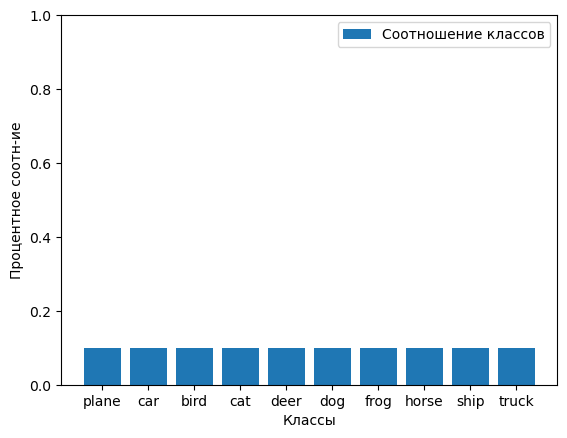

In [23]:
keys = dic_graph.keys()
vals = dic_graph.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Классы")
plt.xticks(list(keys))
plt.legend()
plt.show()

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class Net_conv(nn.Module):
    def __init__(self):
        super(Net_conv, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_conv = Net_conv()
print(net_conv)

Net_conv(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [103]:
class Net_fnn(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.activation = activation
        self.layers = nn.Sequential(
            nn.Linear(32*32*3, 400),
            self.activation,
            nn.Linear(400, 200),
            self.activation,
            nn.Linear(200, 80),
            self.activation,
            nn.Linear(80, 10)
        )

    def forward(self, x):
        x = self.layers(x)
        return x
net_fnn = Net_fnn()
print(net_fnn)

Net_fnn(
  (activation): ReLU()
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=400, bias=True)
    (1): ReLU()
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=80, bias=True)
    (5): ReLU()
    (6): Linear(in_features=80, out_features=10, bias=True)
  )
)


In [104]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [105]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_fnn.parameters(), lr=0.001, momentum=0.9)
net_fnn = net_fnn.to(device)
net_fnn.zero_grad()

In [106]:
%%time
for epoch in range(7): # 10 эпох
    for data in trainloader:  # data-батч данных из 10 картинок
        X, y = data  # X это батч с цветовой палитрой, y это батч с классами
        net_fnn.zero_grad()
        output = net_fnn(X.to(device).view(-1,32*32*3))
        loss = criterion(output, y.to(device))  # вычисляем функцию потерь
        loss.backward()  # передаем это значение назад по сети
        optimizer.step()  # пытаемся оптимизировать значение весов исходя из потерь и градиента
    print(loss)

tensor(1.3727, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4825, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3335, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3991, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8324, device='cuda:0', grad_fn=<NllLossBackward0>)
Wall time: 1min 4s


In [107]:
correct = 0
total = 0

In [108]:
y_pred = []
y_true = []
with torch.no_grad():
    for data in testloader:
        X, y = data
        output = net_fnn(X.to(device).view(-1, 32*32*3))
        # print(X.shape, y.shape, output.shape)
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(correct/total, 3) * 100}%')

Accuracy: 54.7%


# СВЕРТОЧНАЯ СЕТЬ

In [30]:
%%time
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.132
[1,  4000] loss: 1.809
[1,  6000] loss: 1.632
[1,  8000] loss: 1.548
[1, 10000] loss: 1.485
[1, 12000] loss: 1.449
[2,  2000] loss: 1.395
[2,  4000] loss: 1.362
[2,  6000] loss: 1.345
[2,  8000] loss: 1.335
[2, 10000] loss: 1.293
[2, 12000] loss: 1.300
Finished Training
Wall time: 32.4 s


In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

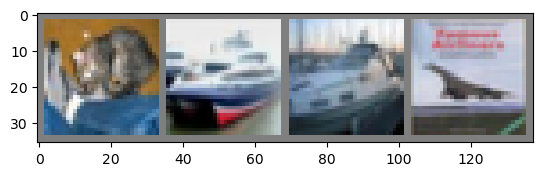

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 71 %
Accuracy of  bird : 39 %
Accuracy of   cat : 19 %
Accuracy of  deer : 44 %
Accuracy of   dog : 65 %
Accuracy of  frog : 58 %
Accuracy of horse : 70 %
Accuracy of  ship : 70 %
Accuracy of truck : 61 %


In [16]:
device = torch . device ( "cuda:0" if torch . cuda . is_available () else "cpu" )
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print ( device )

cuda:0


In [17]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
inputs, labels = data[0].to(device), data[1].to(device)

In [25]:
%%time
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.204
[1,  4000] loss: 1.199
[1,  6000] loss: 1.166
[1,  8000] loss: 1.191
[1, 10000] loss: 1.162
[1, 12000] loss: 1.151
[2,  2000] loss: 1.073
[2,  4000] loss: 1.089
[2,  6000] loss: 1.083
[2,  8000] loss: 1.090
[2, 10000] loss: 1.063
[2, 12000] loss: 1.086
Finished Training
Wall time: 50 s


In [31]:
print('key')

key
